In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [2]:
mean1 = [0,0]
mean2 = [3,0]
mean3 = [0,3]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
cov3 = [[1,0],[0,1]]
random1 = np.random.multivariate_normal(mean1, cov1, 500)
random2 = np.random.multivariate_normal(mean2, cov2, 500)
random3 = np.random.multivariate_normal(mean3, cov3, 500)

In [3]:
ran_obs = random1*0.2 + random2*0.5 + random3*0.3

In [4]:
df_ini = pd.DataFrame({
    'x': ran_obs[:,0],
    'y': ran_obs[:,1]
})

In [5]:
def initialize(k):
    np.random.seed(200)
    centroids = {
        i+1: ran_obs[np.random.randint(0, 500)]
        for i in range(k)
    }
    return centroids

In [6]:
colmap = {1:'r', 2:'g', 3:'b', 4:'y', 5:'cyan'}
def plot_ini(k, df):
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color='k')
    for i in initialize(k).keys():
        plt.scatter(initialize(k)[i][0], initialize(k)[i][1], color=colmap[i])
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 3)
    plt.show()
# plot_ini(3, df)

In [7]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['dis_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_dis_cols = ['dis_from_{}'.format(i) for i in centroids.keys()]
    df['closest_dis'] = df.loc[:, centroid_dis_cols].min(axis=1)
    df['closest'] = df.loc[:, centroid_dis_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('dis_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [8]:
# centroids = initialize(5)
# print(centroids)
# df = assignment(df1, centroids)
# print(df.head())

# fig = plt.figure(figsize=(5, 5))
# plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
# for i in initialize(3).keys():
#     plt.scatter(initialize(3)[i][0], initialize(3)[i][1], color=colmap[i])
# plt.xlim(-0.5, 3.5)
# plt.ylim(-1, 3)
# plt.show()

In [9]:
def update(df, centroids):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return centroids

In [10]:
import copy

In [11]:
def objective(k, df_ini):
    obs = []
    centroids = initialize(k)
    df = assignment(df_ini, centroids)
    print (df)
    for i in range(20):
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(df, centroids)
        df = assignment(df, centroids)
        obs.append(df['closest_dis'].sum(axis=0))
    print (df)
    return obs

In [12]:
objective(5, df_ini)

            x         y  dis_from_1  dis_from_2  dis_from_3  dis_from_4  \
0    0.371591  1.617359    1.626148    0.864463    1.992880    1.459502   
1    1.105563  0.982706    0.975858    0.237631    1.073081    0.584616   
2    3.125127  0.944113    1.231482    2.005612    1.849715    2.017818   
3    1.601950  1.051379    0.522354    0.492690    1.054240    0.772920   
4    1.116161  0.692571    1.124471    0.525964    0.809960    0.296784   
5    0.447937  0.824818    1.642975    0.794523    1.364950    0.845946   
6    1.903358  1.411081    0.080858    0.789016    1.459090    1.240043   
7    2.167206  0.362392    1.060975    1.338209    0.729127    0.986827   
8    2.474197  0.777019    0.798504    1.406808    1.219470    1.345989   
9    1.034673  1.387110    0.949679    0.198283    1.475247    0.994955   
10   2.326376  1.102634    0.458305    1.193657    1.357862    1.341966   
11   2.174061  2.704799    1.311174    1.811943    2.779993    2.506790   
12   1.366394  0.326369  

[221.687497647874,
 217.05705767952628,
 215.048617279532,
 212.9652783802291,
 211.65328842739004,
 210.52124500993466,
 209.76486384003385,
 209.35553500590942,
 208.81877060314363,
 208.47883604986527,
 207.912508008024,
 207.59434690642743,
 206.73908103324678,
 205.94507269081936,
 205.1571817909266,
 204.79767801797942,
 204.715663764737,
 204.585403866025,
 204.5872765802799,
 204.60444534518177]

            x         y  dis_from_1  dis_from_2  dis_from_3  dis_from_4  \
0    0.371591  1.617359    2.193150    0.554032    1.729261    1.443384   
1    1.105563  0.982706    1.357555    0.429131    0.758955    0.787835   
2    3.125127  0.944113    0.662378    2.317663    1.514249    2.404200   
3    1.601950  1.051379    0.866109    0.809322    0.568861    1.118987   
4    1.116161  0.692571    1.372366    0.684635    0.600896    0.532834   
5    0.447937  0.824818    2.019243    0.628750    1.278400    0.689736   
6    1.903358  1.411081    0.720772    1.069575    0.949380    1.587444   
7    2.167206  0.362392    0.663794    1.637244    0.502006    1.347899   
8    2.474197  0.777019    0.180041    1.723493    0.844015    1.733027   
9    1.034673  1.387110    1.491640    0.208593    1.107367    1.159559   
10   2.326376  1.102634    0.199815    1.504052    0.891048    1.728805   
11   2.174061  2.704799    1.771792    1.925745    2.270868    2.804227   
12   1.366394  0.326369  

            x         y  dis_from_1  dis_from_2  dis_from_3  dis_from_4  \
0    0.371591  1.617359    1.707450    0.705402    1.773347    1.443384   
1    1.105563  0.982706    0.931437    0.265838    0.843977    0.787835   
2    3.125127  0.944113    1.128773    2.241277    1.818986    2.404200   
3    1.601950  1.051379    0.432382    0.715104    0.847696    1.118987   
4    1.116161  0.692571    1.019540    0.501788    0.586676    0.532834   
5    0.447937  0.824818    1.607491    0.546067    1.179594    0.689736   
6    1.903358  1.411081    0.269896    1.046027    1.275327    1.587444   
7    2.167206  0.362392    0.818237    1.494033    0.723926    1.347899   
8    2.474197  0.777019    0.599736    1.623132    1.160582    1.733027   
9    1.034673  1.387110    1.008224    0.283489    1.245401    1.159559   
10   2.326376  1.102634    0.314456    1.434325    1.240908    1.728805   
11   2.174061  2.704799    1.545622    2.021174    2.589739    2.804227   
12   1.366394  0.326369  

            x         y  dis_from_1  dis_from_2  dis_from_3  dis_from_4  \
0    0.371591  1.617359    1.893712    0.861402    1.826974    1.314880   
1    1.105563  0.982706    1.133889    0.472763    0.856668    0.676489   
2    3.125127  0.944113    0.941777    1.974025    1.469346    2.387815   
3    1.601950  1.051379    0.634117    0.550207    0.648277    1.043852   
4    1.116161  0.692571    1.213292    0.756533    0.691647    0.443139   
5    0.447937  0.824818    1.809804    0.984975    1.365376    0.573842   
6    1.903358  1.411081    0.379766    0.688998    1.001815    1.508467   
7    2.167206  0.362392    0.838465    1.439934    0.419137    1.361458   
8    2.474197  0.777019    0.493606    1.424212    0.805160    1.715838   
9    1.034673  1.387110    1.198710    0.188751    1.203594    1.036444   
10   2.326376  1.102634    0.144780    1.162135    0.891464    1.685150   
11   2.174061  2.704799    1.506175    1.585170    2.322696    2.700784   
12   1.366394  0.326369  

            x         y  dis_from_1  dis_from_2  dis_from_3  dis_from_4  \
0    0.371591  1.617359    2.229390    0.564666    1.756981    1.335068   
1    1.105563  0.982706    1.388960    0.530318    0.786934    0.704068   
2    3.125127  0.944113    0.631539    2.270000    1.525547    2.404856   
3    1.601950  1.051379    0.899410    0.805792    0.609082    1.068809   
4    1.116161  0.692571    1.398507    0.810898    0.617135    0.469114   
5    0.447937  0.824818    2.048644    0.806311    1.291002    0.587014   
6    1.903358  1.411081    0.758989    0.986626    0.988383    1.533987   
7    2.167206  0.362392    0.658275    1.674806    0.492033    1.372709   
8    2.474197  0.777019    0.158195    1.706275    0.857363    1.732823   
9    1.034673  1.387110    1.527733    0.147762    1.141225    1.063515   
10   2.326376  1.102634    0.237531    1.456792    0.918374    1.706275   
11   2.174061  2.704799    1.799400    1.754186    2.310017    2.728215   
12   1.366394  0.326369  

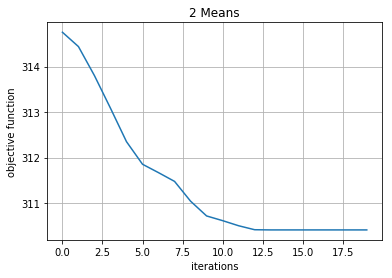

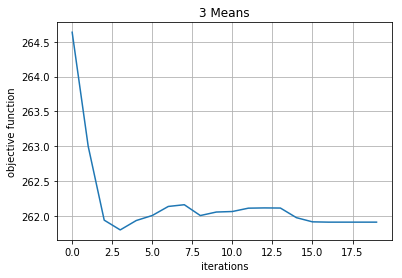

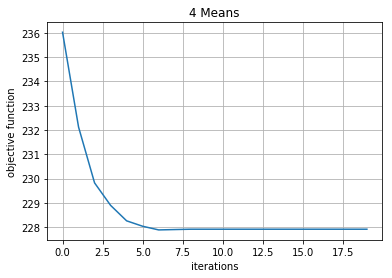

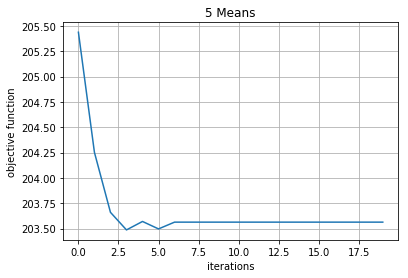

In [13]:
obj_function = {
    k: objective(k, df_ini) 
    for k in range(2,6)
    }
for k in range(2,6):
    plt.plot(obj_function[k])
    plt.grid(True)
    plt.title(str(k)+' Means')
    plt.xlabel('iterations')
    plt.ylabel('objective function')
    plt.show()

In [14]:
def K_means(k, df):
    centroids = initialize(k)
    df1 = assignment(df, centroids)
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(df, centroids)
        df = assignment(df, centroids)
        if closest_centroids.equals(df['closest']):
            break
    return df

In [15]:
def plot_cluster(k, df):
    K_means(k, df)
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in initialize(k).keys():
        plt.scatter(initialize(k)[i][0], initialize(k)[i][1], color=colmap[i])
    plt.xlim(-0.5, 3.5)
    plt.ylim(-1, 3)
    plt.show()

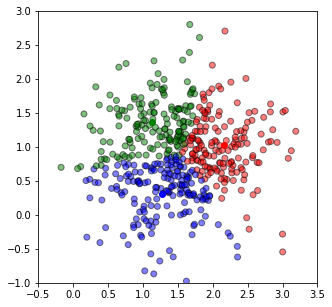

In [16]:
plot_cluster(3, df_ini)

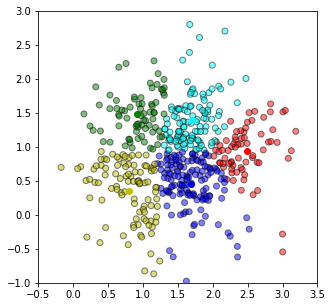

In [17]:
plot_cluster(5, df_ini)